# Time chart (ETH example)

This notebook is designed to teach you how to create time series plots and financial plots using Python. It covers different types of plots such as line charts, candlestick charts, and interactive plots. It also explains how to handle datetime variables and how to customize your plots. These skills are especially useful for those interested in finance, as they can be used to analyze and visualize financial data over time. By following the examples and exercises in this notebook, you will gain a solid understanding of how to create informative and visually appealing time series and financial plots.

In [1]:
#Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import datetime
import matplotlib.dates as mdates

In [2]:
#Import data
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
df = pd.read_csv("/kaggle/input/ethhour/ETH.csv", index_col = 0)
df.head()

/kaggle/input/ethhour/ETH.csv


,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [3]:
#convert date to datetime
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d %I-%p")
#See day
df["Day_week"] = df["Date"].dt.day_name()
df.head()

,Date,Symbol,Open,High,Low,Close,Volume,Day_week
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday


In [4]:
df.dtypes

Date        datetime64[ns]
Symbol              object
Open               float64
High               float64
Low                float64
Close              float64
Volume             float64
Day_week            object
dtype: object

In [5]:
print(f"The total rows are {df.shape[0]} /nThe total rows are {df.shape[1]} ")

The total rows are 23674 /nThe total rows are 8 


In [6]:
#Range days
print(f"The first date an hour is {df.Date.min()} /nThe last date an hour is {df.Date.max()} ")

The first date an hour is 2017-07-01 11:00:00 /nThe last date an hour is 2020-03-13 20:00:00 


# 1. Time plots

Time series analysis is a way of analyzing data that is indexed by time. Python provides many powerful tools for working with time series data, including the pandas library and matplotlib for visualization.

## 1.2 Line chart

A line chart, also known as a line plot or line graph, is a type of chart that displays data as a series of data points connected by straight lines. It is commonly used to show trends over time. Line charts are often used in finance, economics, and other fields to visualize time series data and to identify patterns and trends in the data.

### 1.2.1 Single line chart

The chapter shows how to plot time series data for all available time intervals, including days, weeks, months, and years.

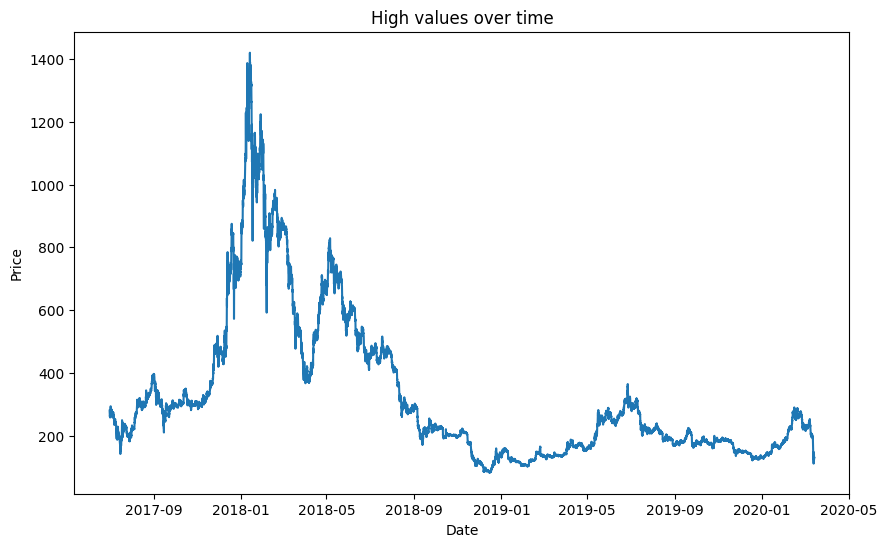

In [7]:
# Create a line chart for the high price over time
plt.figure(figsize=(10, 6))

# The x-axis displays the dates, and the y-axis displays high values.
plt.plot(df['Date'], df['High'])

# Add axis labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('High values over time')

# Display the plot
plt.show()

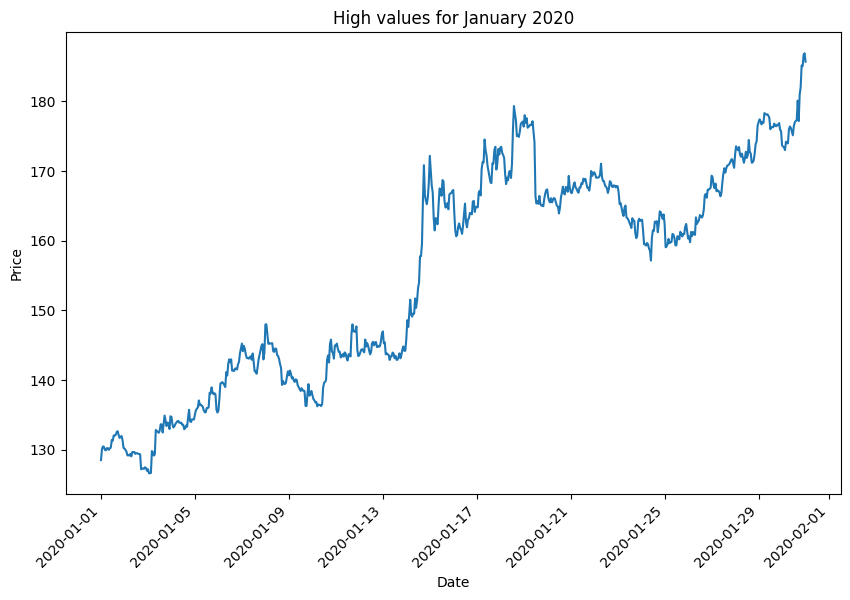

In [8]:
#This code is creating a line plot of the high values of a specific month (January 2020).
plt.figure(figsize=(10, 6))

# Set the start and end dates of the month
start_date = pd.to_datetime('2020-01-01', format='%Y-%m-%d')
end_date = pd.to_datetime('2020-01-31', format='%Y-%m-%d')

# Filter data for the month
one_month = df.loc[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Plot the high values
plt.plot(one_month['Date'], one_month['High'])

# Format the x-axis labels
date_format = '%Y-%m-%d'
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(date_format))

# Add axis labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('High values for January 2020')

# Display the plot
plt.show()


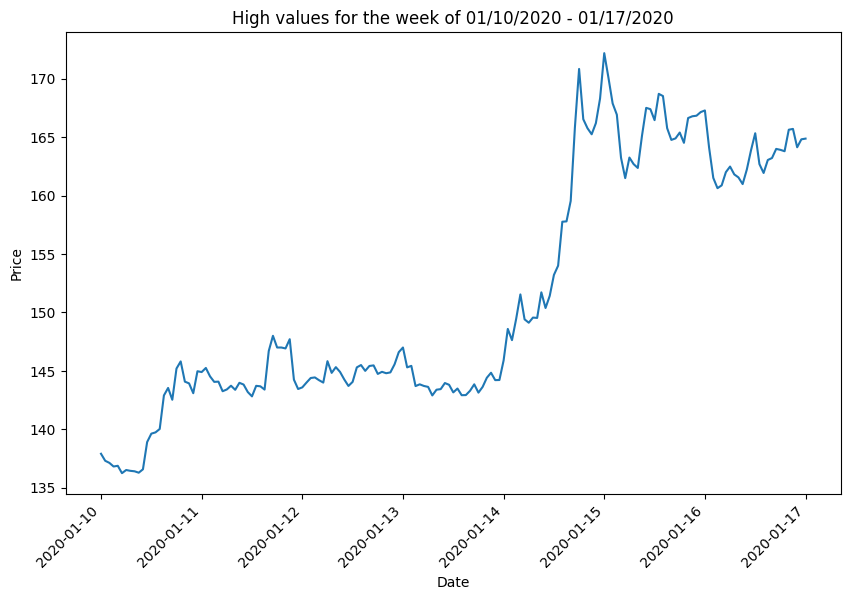

In [9]:
#This code is creating a line plot of the high values of a specific month (01/10/2020 - 01/17/2020).
plt.figure(figsize=(10, 6))

#This code is creating a line plot of the high values of a specific week.
start_date = pd.to_datetime('2020-01-10', format = '%Y-%m-%d')
end_date = pd.to_datetime('2020-01-17', format = '%Y-%m-%d')


# Filter data for one week
one_week = df.loc[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
plt.plot(one_week['Date'], one_week['High'])


#axis in days 
date_format = '%Y-%m-%d'
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(date_format))

# Add axis labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('High values for the week of 01/10/2020 - 01/17/2020')

# Display the plot
plt.show()

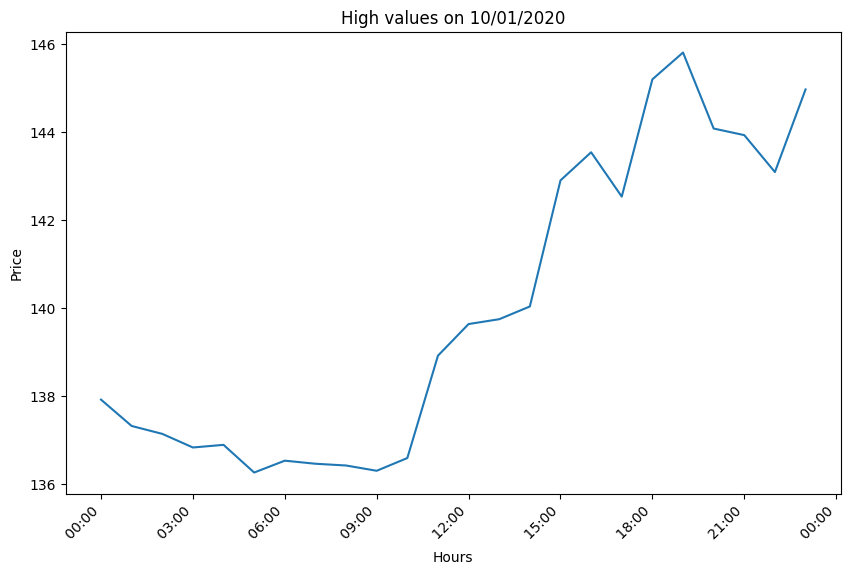

In [10]:

#This code is creating a line plot of the high values of a specific day (January 10th, 2022).
plt.figure(figsize=(10, 6))

# Filter data for one day
one_day = df.loc[df['Date'].dt.date == datetime.date(2020, 1, 10)]
plt.plot(one_day['Date'], one_day['High'])

#axis in hours 
date_format = ' %H:%M'
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(date_format))

# Add axis labels and title
plt.xlabel('Hours')
plt.ylabel('Price')
plt.title('High values on 10/01/2020')

# Display the plot
plt.show()

In [11]:
print(start_date)

2020-01-10 00:00:00


### 1.2.2 Group values by dates  

The chapter show how to group data by date in one phase using the pandas resample() function. This is a powerful function for grouping time-series data as it can perform aggregation operations on the groups such as taking the mean, sum, or count of values.

In [12]:
# For implement the funtions resample the Date will be fixed as a Date
df.set_index("Date", inplace=True)


# this resample creates the max value for days in a High column
df.High.resample("D").max()




Date
2017-07-01    279.99
2017-07-02    293.73
2017-07-03    285.00
2017-07-04    282.83
2017-07-05    274.97
               ...  
2020-03-09    208.65
2020-03-10    206.28
2020-03-11    202.98
2020-03-12    195.64
2020-03-13    148.00
Freq: D, Name: High, Length: 987, dtype: float64

The common rule options in pandas resample method:

* 'D' for calendar day frequency
* 'W' for weekly frequency
* 'M' for month end frequency
* 'Q' for quarter end frequency
* 'A' for year end frequency
* 'H' for hourly frequency
* 'T' or 'min' for minute frequency
* 'S' for second frequency
* 'L' or 'ms' for millisecond frequency
* 'U' or 'us' for microsecond frequency
* 'N' for nanosecond frequency

You can combine nomber with a frecuency, for example, '5D' would represent a frequency of 5 calendar days.

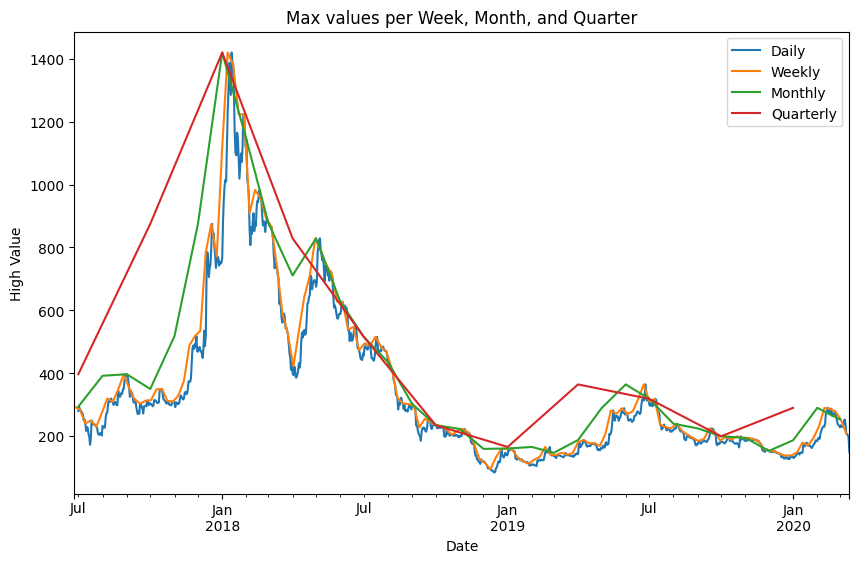

In [13]:
#Plot with resample 
fig, ax = plt.subplots(figsize=(10, 6))

# Resample data by day and get max high value for each day
daily_max_high = df.High.resample("D").max()

# Get the maximum value per week
max_weekly = df.High.resample('W').max()

# Get the maximum value per month
max_monthly = df.High.resample('M').max()

# Get the maximum value per quarter
max_quarterly = df.High.resample('Q').max()




# Plot maximum values per week
daily_max_high.plot(ax=ax, label='Daily')

# Plot maximum values per week
max_weekly.plot(ax=ax, label='Weekly')

# Plot maximum values per month
max_monthly.plot(ax=ax, label='Monthly')

# Plot maximum values per quarter
max_quarterly.plot(ax=ax, label='Quarterly')


# Set x-axis label
plt.xlabel('Date')

# Set y-axis label
plt.ylabel('High Value')

# Set title
plt.title('Max values per Week, Month, and Quarter')


#show legends
plt.legend()

# Show plot
plt.show()

The resample can use work with multiple funtions as:

* mean(): calculates the mean of the values in each time bin
* sum(): calculates the sum of the values in each time bin
* max(): calculates the maximum value in each time bin
* min(): calculates the minimum value in each time bin
* std(): calculates the standard deviation of the values in each time bin
* count(): counts the number of values in each time bin
* first(): gets the first value in each time bin
* last(): gets the last value in each time bin

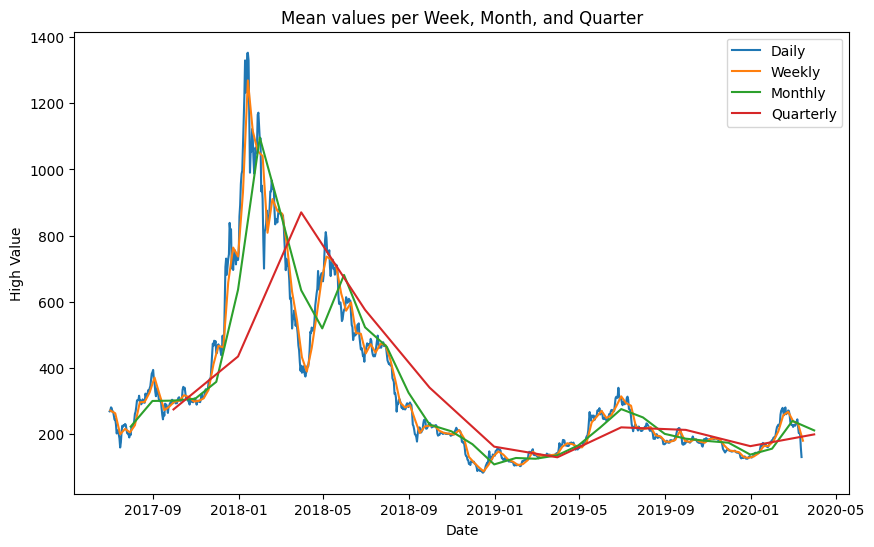

In [14]:
#Plot with resample mean
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate the mean of daily high values
daily_high = df.High.resample('D').mean()

# Calculate the mean of weekly high values
weekly_high = df.High.resample('W').mean()

# Calculate the mean of monthly high values
monthly_high = df.High.resample('M').mean()

# Calculate the mean of quarterly high values
quarterly_high = df.High.resample('Q').mean()

# Plot the mean of daily, weekly, monthly, and quarterly high values

plt.plot(daily_high.index, daily_high, label='Daily')
plt.plot(weekly_high.index, weekly_high, label='Weekly')
plt.plot(monthly_high.index, monthly_high, label='Monthly')
plt.plot(quarterly_high.index, quarterly_high, label='Quarterly')


# Set x-axis label
plt.xlabel('Date')

# Set y-axis label
plt.ylabel('High Value')

# Set title
plt.title('Mean values per Week, Month, and Quarter')


#show legends
plt.legend()

# Show plot
plt.show()

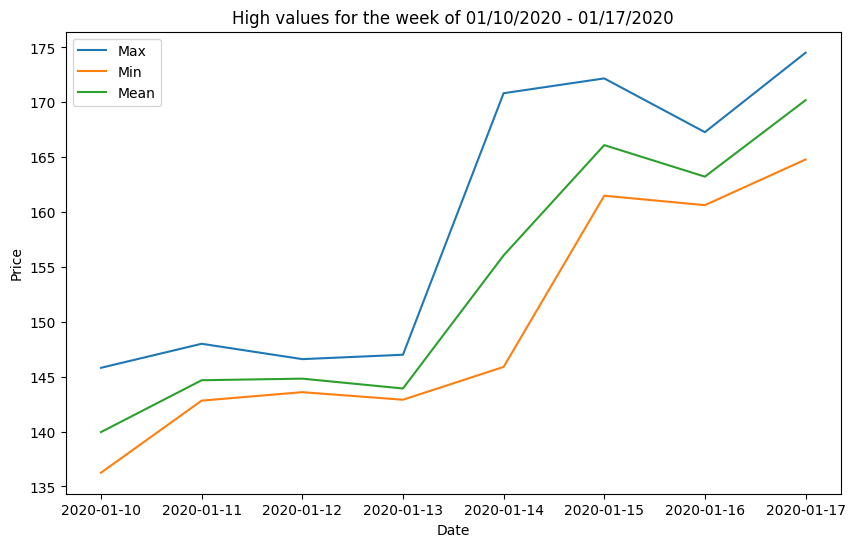

In [15]:
#Plot with resample mean, max and min in one week

fig, ax = plt.subplots(figsize=(10, 6))

one_week = df.loc['2020-01-10':'2020-01-17']

# Resample data to daily frequency
one_day = one_week.resample('D')

# Plot max, min, and mean values for each day
plt.plot(one_day['High'].max(), label='Max')
plt.plot(one_day['High'].min(), label='Min')
plt.plot(one_day['High'].mean(), label='Mean')

# Add axis labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('High values for the week of 01/10/2020 - 01/17/2020')

# Add legend
plt.legend()

# Display the plot
plt.show()


## 1.3 Interactive Line chart

An interactive line chart is a line chart that allows users to interact with the data. It provides features such as zooming, panning, and hover-over information, allowing users to explore the data in greater detail. Interactive line charts are useful for visualizing large datasets and for providing insights into complex relationships between variables over time.